<div class="alert alert-success">
<h2>  Изучение закономерностей, определяющих успешность игр. <a class="tocSkip"> </h2>



# Описание задачи
На анализ взяты данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следуюший год.


# Описание данных 

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#  План работы  (Оглавление)

# Импорт библиотек 

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.ticker as ticker
#from scipy import stats as st
import numpy as np
import warnings; warnings.filterwarnings(action='ignore')
import plotly.express as px
import plotly.graph_objects as go
plt.rcParams['figure.figsize'] = [10,5]
import plotly.figure_factory as ff
import matplotlib.colors as colors
from scipy import stats as st
import numpy as np

# Функции для анализа.

In [92]:
#функция для отрисовки графика "Динамика продаж на платформах по годам"

def sales_graph (name_platforms_top6, ax):
    
    #получаем данные продаж по годам на входящую платформу 
    temp = df_raw[df_raw['platform'] == name_platforms_top6]\
        .pivot_table(
            index='year_of_release', 
            values = 'total_sales', 
            aggfunc='sum')
    
    #преобразуем года в формат int для удобочитаемости
    temp.index = temp.index.astype(int)
    
    #сам график
    temp.plot(ax=ax,
    kind='bar',
    subplots=True,
    legend=True)
    
    ax.set_title(name_platforms_top6 
                 , loc = 'center'
                 , fontsize = 11
                )
    
    ax.tick_params(axis='x', labelrotation=90, labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    
    #уберем легенду и подпись Года к оси х, чтобы не нагружать сетку графиков, график интуитивно понятен итак 
    ax.set_xlabel (None)
    ax.set_ylabel('Млн.копий', fontsize = 9)
    ax.get_legend().remove()

In [93]:
#получаем данные продаж по годам на входящую платформу 
def sales_by_year (platforms):
    for i in platforms:
        t = df_raw[df_raw['platform'] == i]\
            .pivot_table(
                index='year_of_release', 
                values = 'total_sales', 
                aggfunc='sum')

In [94]:
#функция для создания вспомогательного столбца, в котором будет разделение на платформы-лидеров и другие платформы. 
def category_others (x):
    if x not in platf_liders:
       return 'others'
    else:
        return x

# Общая информация

Загрузим файл и откроем его первые 5 строк для общего ознакомления.

In [95]:
#чтение файла 
df_raw = pd.read_csv('games.csv')

In [96]:
#вывод первых пяти строк датафорейма
df_raw.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Уже сразу видим пропуски Nan в первых пяти строках, названия столбцов с заглавной буквы. Необходимо будет привести названия столбцов к нижнему регистру в предобработке данных.  
Посмотрим какие типы данных нам предоставлены и сколько пропусков в данных. 

In [97]:
# info датасета
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Для начала приведем все столбцы к нижнему регистру.

In [98]:
#приведение названий столбцов к нижнему регистру 
df_raw.columns =df_raw.columns.str.lower()

In [99]:
#размеры датасета
df_raw.shape

(16715, 11)

Итак, исходный датасет состоит из 11 столбцов и 16444 строк.   

Содержит данные числового и строчного типа. Несоотвествие типов данных можно заподозрить в Year_of_Release, его нужно будет привести к формату date, и User_Score нужно будет привести к float64.  

В пяти столбцах есть пропуски, это столбцы Name, Year_of_Release, Critic_Score, User_Score, Rating.   

# Предобработка данных.
## Приведение столбцов к соотвествующим типам. 

Приведем данные к соотвествующему типу где необходимо. Ранее выявлено несоотвествие в Year_of_Release и User_Score.   
Преобразуем год выпуска столбец 'year_of_release' в формат цельночисленного числа int,т.к. представлены только года  и последующая работа будет более удобнее. 

In [100]:
#перевод year_of_release в тип int
#ввиду пропусков используем также errors='ignore', чтобы код игнорировал ошибки на пропусках
df_raw['year_of_release'] = df_raw['year_of_release'].astype('int', errors='ignore')

В процессе анализа выявлено значение  в user_score -tbd. TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. 
Данных значит пока нет,тогда заменим на Nan.

In [101]:
#games['user_score'] = games['user_score'].astype('float') # при выполнении данного когда получаем ошибку, так как 
# код не может обработать знгачение'tbd'

In [102]:
#замена в user_score значения tbd на Nan 
df_raw['user_score'] = pd.to_numeric(df_raw['user_score'], errors='coerce')


## Пропуски.

Выведем сколько пропусков в датасате в абсолютном и процентном выражении.

In [103]:
#кол-во пропусков 
df_raw.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [104]:
#процент пропусков 
round(df_raw.isna().mean()*100, 2)

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         54.59
rating             40.48
dtype: float64

Итак, значительная часть пропусков в датасетете в показателях оценок игр: critic_score  -51.32%, user_score - 40.09%, rating - 40.48%. Оценка  вещь субъективная и мы не можем представить как оценит пользователь игру, т.е. и заполнить ее искуственным значением, не искажая данных, не представляется возможным. 

В столбце с названиями игры 'name' и жанром игры 'genre' по 2 пропуска,это очень мало,удалим их. Предполагаю здесь пропуск обусловлен человеческим фактором.

Пропуски в столбце с годом выпуска 'year_of_release' могут быть вызваны и человеческим фактором и ошибкой выгрузки. Возможности восстановить или заполнить пропуски корректно нет, их 1,61%. Малый процент пропусков позволяет удалить соотвествующие строки.  

Рейтинг не проставлен для многих платформ, произойти это могло вследствии того, что ESRB (был создан в 1994 и действует в США и Канаде) для игр, созданных раньше или распространяемых в других странах, мог не проставляться. Определение рейтинга происходит с подачи издателя, если он не пришлет заявку на рейтинг, то и рейтинга у него не будет. Данных слишком много, чтобы их отбросить (более 40%). Подобрать значение невозможно. Заменим на "no_rating".
 

In [105]:
#удаление пропусков в определенных столбцах 
df_raw = df_raw.dropna(subset = ['name', 'genre', 'year_of_release']).reset_index()

In [106]:
#замена пропусков в столбце rating на "no_rating"
df_raw['rating'] = df_raw['rating'].fillna("no_rating")

## Дубликаты.

Проверим датасет на явные дубликаты.

In [107]:
#кол-во явных дубликатов
df_raw.duplicated().sum()

0

Явных дубликатов нет. Теперь посмотрим какие варианты наименований у нас могут быть в каждом строковом  столбце, это позволит увидеть скрытые пропуски и дубликаты или другие некорректные данные.

### Столбец name.

In [108]:
#кол-во уникальных значений в столбце
df_raw ['name'].nunique()

11426

In [109]:
#игры датасета
sorted(df_raw['name'].unique())

[' Beyblade Burst',
 ' Fire Emblem Fates',
 " Frozen: Olaf's Quest",
 ' Haikyu!! Cross Team Match!',
 ' Tales of Xillia 2',
 "'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Ri

Названий игр более 11 тыс., выявить неявный дубликат среди такого количества не предоставляется возможным.  

### Столбец platform.

In [110]:
#кол-во уникальных платформ
df_raw ['platform'].nunique()

31

В датасете представлены 31 платформа, ну уж такое кол-во можно осилить глазами.   
Посмотрим названия платформ и их распределние  по количеству игр.

In [111]:
#распределние по количеству игр
df_raw['platform'].value_counts()

PS2     2127
DS      2121
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [112]:
# %игр на платформе 
round(df_raw['platform'].value_counts(normalize=True)*100,2)

PS2     12.93
DS      12.90
PS3      7.94
Wii      7.82
X360     7.49
PSP      7.25
PS       7.24
PC       5.82
GBA      4.93
XB       4.88
GC       3.30
3DS      3.11
PSV      2.61
PS4      2.38
N64      1.92
XOne     1.50
SNES     1.45
SAT      1.05
WiiU     0.89
2600     0.71
NES      0.60
GB       0.59
DC       0.32
GEN      0.16
NG       0.07
WS       0.04
SCD      0.04
3DO      0.02
TG16     0.01
PCFX     0.01
GG       0.01
Name: platform, dtype: float64

По изначальным датам можно увидеть, что больше всего игр на платформах PS2, на ней представлено 12.93% от всех игр и DS, на ней 12.90%.    

Обращает на себя внимание малое кол-во игр на платформах SCD, WS, 3DO, TG16, GG, PCFX, можно заподозрить опечатку. Но, сверив список платформ из датасета c перечнем платформ в интернете, я убедилась в корректности названий.    

### Cтолбец genre.

In [113]:
#кол-во представленных жанров
df_raw ['genre'].nunique()

12

In [114]:
#распределение игр по жанрам
df_raw['genre'].value_counts()

Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

In [115]:
# %игр по жанрам
round(df_raw['genre'].value_counts(normalize=True)*100,2)

Action          20.11
Sports          14.02
Misc            10.47
Role-Playing     9.01
Shooter          7.88
Adventure        7.86
Racing           7.46
Platform         5.34
Simulation       5.21
Fighting         5.09
Strategy         4.09
Puzzle           3.46
Name: genre, dtype: float64

В датасете указано 12 жанров. Самыми попудярными жанрами являются Action -20,11%, Sports - 14,02%, Misc - 10,47%. Дубликатов нет.

### Cтолбец rating.

In [116]:
#распределение игр по рейтингам
df_raw['rating'].value_counts()

no_rating    6676
E            3921
T            2905
M            1536
E10+         1393
EC              8
K-A             3
AO              1
RP              1
Name: rating, dtype: int64

Обратившись к определению рейтингов ESRB, увидим, что в данных является некорректным рейтинг K-A. K-A (Kids to Adults) - это первоначальное название для рейтинга E. Сотвественно нужно перенести все K-A строки к рейтингу E (Everyone).


In [117]:
#перенос K-A строк к рейтингу E
df_raw['rating'] = df_raw['rating'].replace('K-A', 'E')

## Выбросы.
Числовые данные и год выпуска проверим также на корректность, в частности на выбросы и аномалии.
### Столбец  year_of_release.

In [118]:
#распределение игр по годам  
#df_raw ['year_of_release'].value_counts().sort_index()

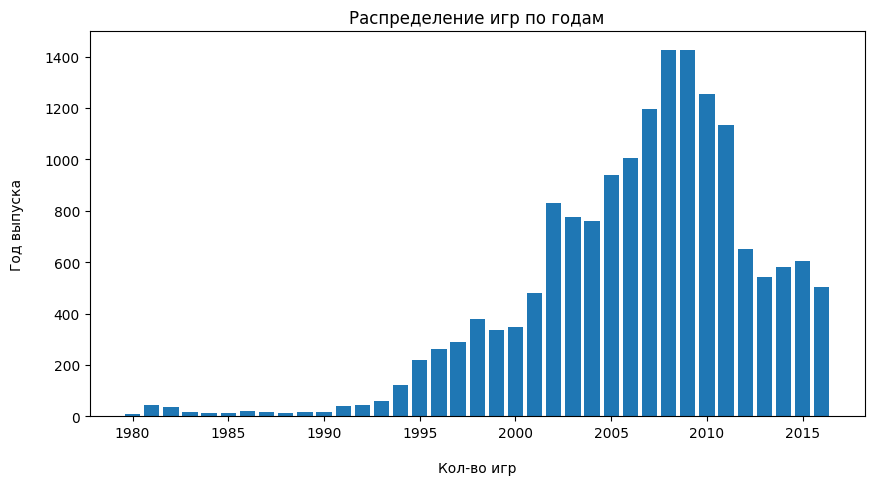

In [119]:
#график распределения игр по годам 

#подсчет игр на каждой платформе
counts=df_raw['year_of_release'].value_counts().sort_values(ascending=True)

# установка заголовков
plt.xlabel('Кол-во игр',labelpad=15, fontsize=10)
plt.ylabel('Год выпуска', labelpad=15, fontsize=10)
plt.title('Распределение игр по годам', ) ### установи размер титулки 20
#сам график
plt.bar(x=counts.index, height =counts.values);

Представлены данные за 1980-2016гг. Аномалий не выявлено.

### Столбец na_sales,  eu_sales,  jp_sales, other_sales.

Построим boxplot для представления о данных.

In [120]:
#График 
fig = go.Figure()

fig.add_trace(go.Box(x= df_raw['na_sales'], name = 'na_sales'))

fig.add_trace(go.Box(x= df_raw['eu_sales'], name='eu_sales'))

fig.add_trace(go.Box(x= df_raw['jp_sales'], name='jp_sales'))

fig.add_trace(go.Box(x= df_raw['other_sales'], name='other_sales'))


fig.update_layout(
      title_text='Распределение продаж по регионам',
      title_font_size=20,
      xaxis_title='Продажи',
     xaxis_rangeslider_visible=True  # слайдер
 )


Из графика видно, что у продажи в каждом регионе имеют свои выбросы: 
- other_sales - принимает значения до 10.57, за выбросы можно принять значения больше 5, кол-во 3.
- jp_sales - max = 10.22, выбросы - значения больше 7, кол-во 3,
- eu_sales - max = 28.96, выбросы - значения больше 10, кол-во 3,
- na_sales - max = 41.36, выбросы - значения больше 16, кол-во 4.

Итак, выбросы есть, но учитывая из количество и значения,  в датасете с 16 тыс. строк выбросы не исказят кардинально выводы.

Для дальнейшей работы выведем суммарные продажи по регионам.

In [121]:
df_raw['total_sales'] = df_raw [['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

## Итоги по подготовке данных. 

В анализируемом датасете 11426 игр, представленных на 31 платформах и в 12 жанрах.

По изначальным датам можно увидеть, что больше всего игр на платформах PS2, на ней представлено 12.93% от всех игр и DS, на ней- 12.90%. Самыми попудярными жанрами являются Action -20,11%, Sports - 14,02%, Misc - 10,47%

В представленном датасете есть пропуски в столбцах 'name', 'genre' и 'year_of_release'. В силу малой %доли пропусков и невозможности восстановить или заполнить пропуски корректно исскуственным значение, строки с данными пропусками удалены.   

Также есть пропуски в столбцах с оценками: critic_score, user_score, rating. Пропуски составляют почти 50% данных, заполнение исскуственным значением невозможно, это исказить выводы иссследования. Оставим их без изменений, за пропусками может скрываться важная информация.

Пропуски в столбце rating заполнены на говорящее no_rating.

Были преобразованы форматы столбцов 'year_of_release' в формат цельночисленного числа int и 'user_score' к численному типу float. 

Явных и неявных дубликатов в датафрейме не обнаружено.

В значениях продаж по регионам есть выбросы. Они оставлены без изменений, при дальнейшем анализе просто нужно иметь это в виду.  
Создан дополнительный столбец с итоговыми продажами по всем регионам.

# Исследовательский анализ данных.

## Количество выпущенных игр по годам.

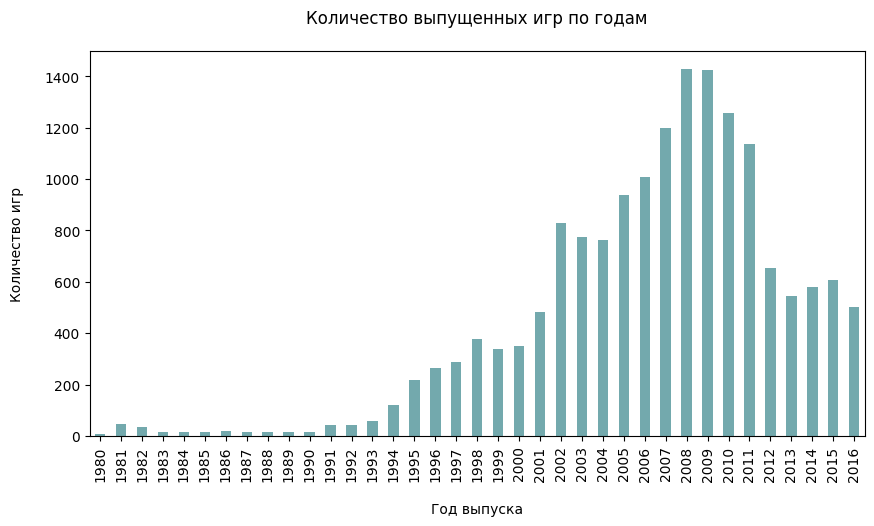

In [122]:
#График 
count_by_year = df_raw.groupby('year_of_release')['name'].count()

count_by_year.index = count_by_year.index.astype(int)

count_by_year.plot(kind='bar', color='#73A9AD')

plt.title('Количество выпущенных игр по годам', pad=20)
plt.xlabel('Год выпуска', labelpad=15)
plt.ylabel('Количество игр', labelpad=15)

plt.show;

По графику можно увидеть, что производство игр начало стремительно расти с 1991г. И это подтверждает Википедия: "1990-е годы были ознаменованы заметными инновациями в компьютерных играх. Основными достижениями называют переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO." Пик значений приходится на 2008-2009 гг.

## Продажи по платформам.

### Общие данные.
Посмотрим продажи в разрезе платформ:

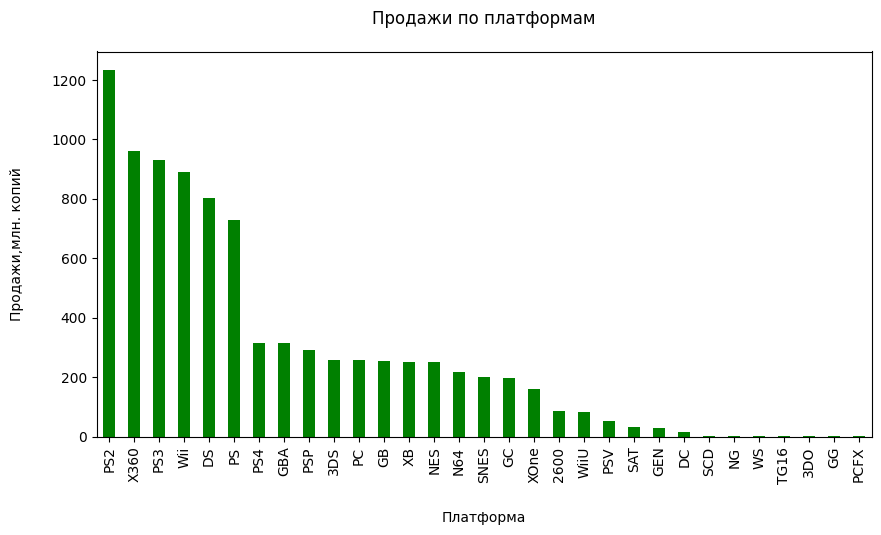

In [123]:
# график

df_raw.groupby('platform')['total_sales'].sum().sort_values(ascending = False).plot(kind='bar',color='g' )
    
plt.title('Продажи по платформам', pad=20)
plt.xlabel('Платформа', labelpad=20)
plt.ylabel('Продажи,млн. копий', labelpad=20)

plt.show;

График показал нам 6 платформ-лидеров по продажам - это PS2, X360, PS3, Wii, DS, PS за весь период.   

Изучим динамику продаж во времени на этих платформах. 

### Вдруг откуда не возьмись несоотвествие в данных  =о

Но прежде исправим выявленную в процессе анализа ошибку. График платформы DS показал продажи в выбивающеемся из временного ряда 1985 году, хотя платформа DS(Nintendo DS) не могла продаваться в 1985г., так как произведена в 2004 году.

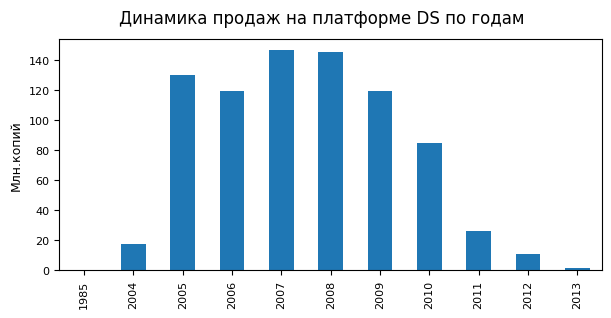

In [124]:
#график, который показал несоответствие
#задаем сетку
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3))
 
fig.suptitle('Динамика продаж на платформе DS по годам')

#нарисуем график, используя заготовленную функцию
sales_graph ('DS', ax)

ax.set_title('');

Посмотрим данные за 1985 год. 

In [125]:
#продажи платформы DS в 1985 г. 

df_raw[(df_raw['year_of_release']==1985 ) & (df_raw['platform'] == 'DS')]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,no_rating,0.02


Некорректность года выпуска  вызвана тем, что японские шахматы "Shogi" были переизданны с платформы NES 1985г. на DS  в 2005года.

In [35]:
#исправим год
df_raw.loc[15957, 'year_of_release'] = 2005

Ну а теперь можно спокойно переходить к лидерам продаж.

### Лидеры продаж.

In [130]:
#платфомы и их продажи 
top_platform = df_raw.pivot_table(index='platform',values='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales',ascending = False).reset_index()
top_platform ['per']= round(top_platform['total_sales'] / top_platform['total_sales'].sum()*100, 2)
top_platform

,platform,total_sales,per
0,PS2,1233.56,13.99
1,X360,961.24,10.91
2,PS3,931.34,10.57
3,Wii,891.18,10.11
4,DS,802.78,9.11
5,PS,727.58,8.25
6,PS4,314.14,3.56
7,GBA,312.88,3.55
8,PSP,289.53,3.28
9,3DS,257.81,2.92


По полученным данным можно выделить следующих лидеров - PS2, X360, PS3, Wii, DS, PS.

In [37]:
#лидеры согласно исходному датасету, переменной name_platforms_top6 
name_platforms_top6 = list(top6_platform['platform'])
name_platforms_top6 #лидеры согласно исходному датасету 

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Посторим график  динамики продаж по годам для каждой платформы из списка. 

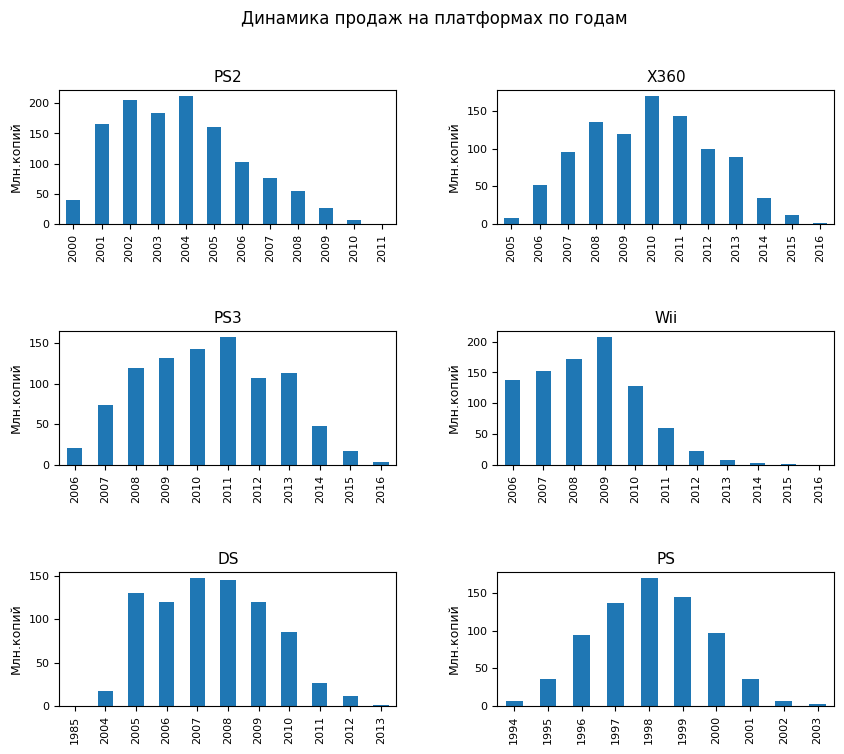

In [38]:
#графики для платформ лидеров 
#задаем сетку
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))

#задаем расстояние между графиками в сетке 
plt.subplots_adjust(wspace=0.3, hspace=0.8)
 
fig.suptitle('Динамика продаж на платформах по годам')

#пройдем через цикл по каждой ячейке сетки, заполняя графиком с платформой по порядку 
num = 0
for i in range(3):
    for j in range(2):
        sales_graph(name_platforms_top6[num], ax[i, j])
        num += 1

У всех платформ стремительный рост и не менее стремительное падение. По графикам можно увидеть, что платформы имеют жизненный цикл примерно в 10 лет. Максимальные продажи в лучшие годы жизни платформ составляли 150-200 млн.копий.    

Графики платформ PS2,Wii,DS скошены вправо, резкий взлет продаж и более постепенное снижение. А графики платформы X360, PS3 и PS распределены нормально, постепенный рост и постепенное снижение после пика.   

Здесь можно усмотреть 2 сценария жизни успешной игры: 
1. высокие продажи сразу на следующий год после запуска платформы 
2. равномерный рост в течение 5- 6 лет после запуска

### Продолжительность жизни платформы.

Графики графиками, но цифры лучше знают. Посчитаем среднюю продолжительность жизни по всем платформам и сравним с успешными.

In [39]:
#средний лайфтайм для всех платформ 

plat_life_all = df_raw.groupby(by=['platform'])\
    .agg(
            min_year=('year_of_release', 'min'),
            max_year=('year_of_release', 'max'),
            platform_lifetime=('year_of_release', lambda x: x.max() - x.min()))\
    .sort_values(by='platform_lifetime',ascending = False).reset_index()


plat_life_all['platform_lifetime'].median()

6.0

In [40]:
#средний лайфтайм для успешных платформ

plat_life = df_raw[df_raw['platform'].isin(name_platforms_top6)]\
    .groupby(by=['platform'])\
    .agg(
            min_year=('year_of_release', 'min'),
            max_year=('year_of_release', 'max'),
            platform_lifetime=('year_of_release', lambda x: x.max() - x.min()))\
    .sort_values(by='platform_lifetime',ascending = False).reset_index()

plat_life['platform_lifetime'].median()

10.5

Итак, если в среднем игровая платформа живет 6 лет, то жизнь успешых платформ дольше и составляет 10,5 лет.  
Но компьютерные игры - динамично развивающаяся индустрия  и для целей прогнозирования продаж на следующий год возьмем данные за предыдущие 3 года. 

### Определение актуального периода для исследования.

Мы вычислили средний лайфтайм платформ в общем и успешных платформ - это 6 и 10 лет соотвественно. Но компьютерные игры - динамично развивающаяся индустрия и взяв слишком большой временной интервал обязательно захватишь уже отжившие тренды. Поэтому для целей целей прогнозирования продаж на следующий год возьмем данные за предыдущие 3 года. 

In [41]:
#датасет за актуальный период
df= df_raw.query('year_of_release > 2013')

## Анализ за актуальный период 2013-2016гг. 
### Продажи по платформам по общим продажам.  
Посмотрим какая платформа продала больше всего копий  период 2013-2016 по сводной таблице и построим график по ней.

In [143]:
# продажи по платформам 2013-2016гг.(total_sales_current_platf)

total_sales_current_platf = df.pivot_table(
    
        index='platform', 
        values = 'total_sales', 
        aggfunc='sum'
    
    ).sort_values(
    
        by='total_sales',
        ascending = False
    
    )#.reset_index()


total_sales_current_platf['per'] = round (
    total_sales_current_platf['total_sales']/total_sales_current_platf['total_sales'].sum()*100
    ,2
    )

#изменение %продаж платформы по сравнению с предыдущей
total_sales_current_platf['sales_pct_change'] = round (
        total_sales_current_platf['total_sales'].pct_change()*100
     ,2
     )

total_sales_current_platf


,total_sales,per,sales_pct_change
platform,,,
PS4,288.15,39.50,NaN
XOne,140.36,19.24,-51.29
3DS,86.68,11.88,-38.24
PS3,68.18,9.35,-21.34
X360,48.22,6.61,-29.28
WiiU,42.98,5.89,-10.87
PC,27.05,3.71,-37.06
PSV,22.40,3.07,-17.19
Wii,5.07,0.70,-77.37


In [135]:
#платформы-лидеры 2013-2016гг.(platf_liders)')
platf_liders = list(total_sales_current_platf.head().index)
platf_liders

['PS4', 'XOne', '3DS', 'PS3', 'X360']

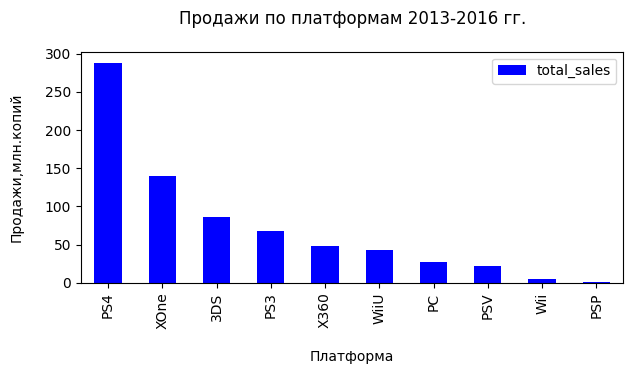

In [44]:
#график
df.pivot_table(
    
    index='platform', 
    values = 'total_sales', 
    aggfunc='sum'
    
    ).sort_values(by='total_sales',ascending = False).reset_index()\
    .plot(
    
    x = 'platform', 
    kind='bar', 
    figsize=(7, 3), 
    color='b',)


plt.title('Продажи по платформам 2013-2016 гг.', pad=20)
plt.xlabel('Платформа', labelpad=15)
plt.ylabel('Продажи,млн.копий', labelpad=15)
plt.show()

Из графика видно, что со значительным отрывом в лидерах по продажах платформы PS4, на 2ом месте платформа XOne, она сделала продаж вдвое  меньше. Втрое меньше PS4 сделала пллатформа 3DS и остальные прлатформы идут дальше по убывающей c шагом 20-30% до практически околонулевых значений платформы PSP. 

#### Лидеры продаж по общим продажам.  
Для дальнейшего анализа возьмем пятерку лидеров, а остальные платформы сгруппируем в условную платформу Others. В некоторых случаях где это будет нагляднее применим это разделение. Создадим дополнительный столбец 'category', в котором будут лидеры, а остальные платформы будут в категории Others.

In [45]:
#создание допстолбца с применением заранее заготовленной функции
df['top'] = df['platform'].apply(category_others)

In [46]:
#проверка
df['top'].unique()

array(['PS4', '3DS', 'XOne', 'others', 'PS3', 'X360'], dtype=object)

In [144]:
#продажи по топ-платформам 2013-2016гг.'
sales_by_top = df.groupby('top')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

sales_by_top

,top,total_sales
2,PS4,288.15
4,XOne,140.36
5,others,97.86
0,3DS,86.68
1,PS3,68.18
3,X360,48.22


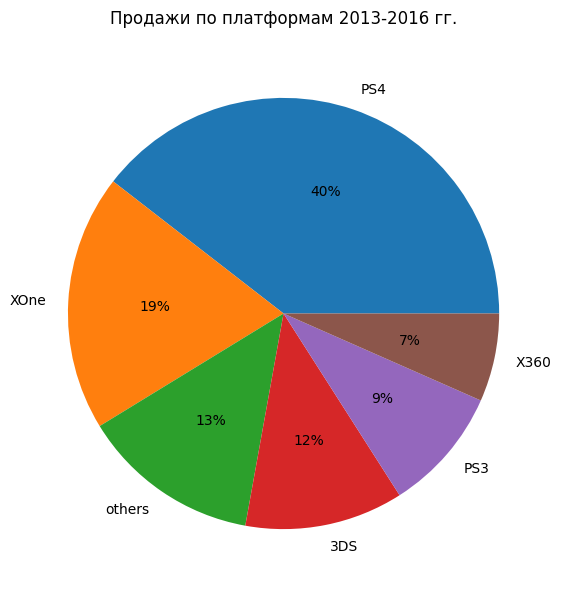

In [146]:
#график

sales_by_top.plot(
        x ='top', 
        y='total_sales',
        kind='pie', 
        figsize=(7,7), 
        legend=False,
        labels = sales_by_top ['top'],
        autopct='%1.00f%%',
        subplots=True, 
        fontsize=10
            )

plt.title('Продажи по платформам 2013-2016 гг.', pad=15)
plt.ylabel('', labelpad=15)
plt.xlabel('', labelpad=15)
plt.show()

In [147]:
#продажи по годам топ-платформ 2013-2016гг. 

sales_top_annuale= df.pivot_table(
        index = 'year_of_release',
        columns = 'top',
        values = 'total_sales',
        aggfunc= 'sum'
        ).reset_index()


sales_top_annuale

top,year_of_release,3DS,PS3,PS4,X360,XOne,others
0,2014.0,43.76,47.76,100.00,34.74,54.07,51.20
1,2015.0,27.78,16.82,118.90,11.96,60.14,32.38
2,2016.0,15.14,3.60,69.25,1.52,26.15,14.28


In [148]:
#график

fig = go.Figure()

for col in sales_top_annuale.columns[1:]:
    fig.add_trace(go.Scatter(x=sales_top_annuale['year_of_release'], y=sales_top_annuale[col], name=col))

fig.update_layout(
     title_text='Динамика продаж топ-платформ в 2014-2016гг.',
     xaxis_title='Год',
     yaxis_title = 'Млн.копий',
        xaxis = dict(
            dtick = 1
        ))

Как видим, продажи топ-платформ падают последние 3 года, 2015 год был не самым лучшим для все платформ.  Можно сказать, что 2017 год будет благопритяным для входа новой платформы на рынок. Интересно, что абсолютные лидеры платформы XOne и PS4 показали прирост в 2015 к предыдущему 2014 году.  

Интересно, что способстовало этому например платформе PS4.   
Play Station 4 перевыпустид ряд игр на своей платформе,так как больше половины пользователей PS4 никогда раньше не имели PS3, пропустили прошлое поколение консолей либо были владельцами консолей от Microsoft и/или Nintendop и не имели возможности поиграть в такие игры. Также выпущена специальная версия консоли PlayStation 4, выполненная в цветах классической приставки. Всего произведено и продано 12 300 таких консолей. 

В то время платформа, которую взяли 'за компанию', 3DS показала равномерное снижение продаж от года к году, доступной информации об обновлениях и др. стимулирующих активновностях не найдено для 3DS. Падение у этой платформы было не такое резкое, но платформа и не взлетала высоко, чтобы больно падать.

Вывод: движение - жизнь, для успеха платформам необходимы нововведения и обновления. 

###  Продажи по платформам по медианным значениям.  
#### Распределение значений продаж (боксплоты)

Рассмотрим распределение значений продаж по платформам, прежде всего интресует медианна. 

In [151]:
#медианные значения продаж

current_years_sales_all_median = df.pivot_table(
    
        index='platform', 
        values = 'total_sales', 
        aggfunc='median'
    
    ).sort_values(
    
        by='total_sales',
        ascending = False
    
    ).reset_index()

current_years_sales_all_median['per'] = round (
    current_years_sales_all_median['total_sales']/current_years_sales_all_median['total_sales'].sum()*100
    ,2
    )

#изменение %продаж платформы по сравнению с предыдущей
current_years_sales_all_median['sales_pct_change'] = round (
        current_years_sales_all_median['total_sales'].pct_change()*100
     ,2
     )

current_years_sales_all_median #табл  с медианными значениями продаж

,platform,total_sales,per,sales_pct_change
0,XOne,0.205,16.27,NaN
1,WiiU,0.190,15.08,-7.32
2,PS4,0.185,14.68,-2.63
3,Wii,0.180,14.29,-2.70
4,X360,0.180,14.29,0.00
5,PS3,0.110,8.73,-38.89
6,3DS,0.090,7.14,-18.18
7,PC,0.060,4.76,-33.33
8,PSV,0.040,3.17,-33.33
9,PSP,0.020,1.59,-50.00


По медианным значениям таблица лидеров уже выглядит по другому. Выделяются 5 платформ:XOne, WiiU, PS4, Wii,X360.

In [149]:
# график

fig = go.Figure()


for i in list(reversed(current_years_sales_all_median['platform'])):
    
    #подадим список в обратном порядке для расположения графиков в порядке уменьшения медианны
    fig.add_trace(go.Box(x =df[df ['platform']== i]['total_sales'], name = i))
 
    
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
      title_text='Распределение продаж платформ 2014-2016 гг.',
      title_font_size=20,
      xaxis_title='Продажи, млн.копий',
     xaxis_rangeslider_visible=True  # слайдер
 )

fig.show()


В среднем продажи игр варьируются от 0,180 млн. до 0,205 млн. по платформам. Самый длиный правый ус у боксплота платформы WiiU т.е. ее максимальные продажи игр в среднем выше, чем у остальных платформ.  

PS4, которая была лидером по общим продаж, сейчас же занимает только третье место. Платформа PS4 имеет много выбросов и их максимальлные значения больше, максимальный выброс 14 млн.копий!!!. Для интереса посмотрим что за игра сделала продажи болле 14 млн. копий.

In [152]:
#инфо о самой продаваемой игре
df[(df['platform']=='PS4')&(df['total_sales']>14) ]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,top,sales_pct_change
31,31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63,PS4,NaN


Википедия рассказывает интересные факты об этой игре.   
В первые три дня продаж игра заработала 550 миллионов долларов.   
Игра стала самой продаваемой сначала по итогам  2015 года.   
По сообщениям Activision, Black Ops III стала одной из самых продаваемых игр для консолей восьмого поколения.

Примечательно, что в датасете нет ни одной оценки этой игры: ни от критиков, ни от пользователей, и нет рейтинга.   
Да королям это и не нужно!
И да, для успеха платформы нужно иметь в портфеле пару игр-хитов.

 ## Выводы.
Производство игр начало стремительно расти с 1991г, пик значений приходится на 2008-2009 гг. 
В процессе исследовательского анализа выявлена и устранена ошибка в годе выпуска игры Shogi на платформе DS.  

Лидерами продаж за весь рассматриваемый период платформы PS2, X360, PS3, Wii, DS, PS.   
Были изучены продажи платформ в динамике по годам. У всех платформ наблюдается стремительный рост и не менее стремительное падение. Максимальные продажи в лучшие годы жизни платформ составляли 150-200 млн.копий. 

По динамике продаж платформ также можно усмотреть 2 сценария жизни успешной игры: 
1. высокие продажи сразу на следующий год после запуска платформы 
2. равномерный рост в течение 5- 6 лет после запускаПлатформы имели жизненный цикл примерно в 10 лет. 

В среднем игровая платформа живет 6 лет, а жизнь успешых платформ дольше и составляет 10,5 лет.
Так как компьютерные игры - динамично развивающаяся индустрия для целей прогнозирования продаж на следующий год период исследования сокращен до 3 лет - это 2014-2016г.    

За 2014-2016 гг. со значительным отрывом в лидерах по общим продажах платформы PS4, на 2ом месте платформа XOne, она сделала продаж вдвое  меньше PS4. Втрое меньше PS4 сделала пллатформа 3DS. И остальные прлатформы идут дальше по убывающей c шагом 20-30% до практически околонулевых значений платформы PSP. 

Также было изученно распределение платформ по медианным значениям. Здесь выделись 5 платформ- XOne, WiiU, PS4, Wii,X360. И разрыв между платформами Значительно меньше чем по общим продажам, он не превышает 7%. 

В среднем продажи игр варьируются от 0,180 млн. до 0,205 млн. по платформам. Самые высокие максимальные средние продажи у  платформы WiiU.

PS4, которая была лидером по общим продаж, сейчас по медианным значениям занимает только третье место , т.к. имеет много выбросов и максимальлные значения ее выбросов выше чем у остальных платформ.




# Поиск взаимосвязей в данных.
## Оценки и продажи. 
Посмотрим какими оценками пользователей, оценками критиков и рейтингом обладают игры, а конкретно игры с высокими продажами.   

Есть ли корреляция?
### Отзывы пользователей.

In [154]:
#график 
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['user_score'], y=df['total_sales'], mode='markers'))
     
fig.update_layout(
      title_text='График корреляции между отзывами пользователей и продажами 2014-2016 гг.',
      title_font_size=20,
      yaxis_title='Продажи, млн.копий',
      xaxis_title='Оценки пользователей',
      xaxis=dict(dtick=0.5)
 )

fig.show()

Примечательно, что для отзывов определена шкала до 10 баллов, игр  с оценкой больше 9,3  даже и нет.
Самая продаваемая игра 12,62 млн. копий имеет не самую высокую оценку 8,3. Вторая по продажам игра 8,58 млн имеет вообще оценку 4,3.


В интервале от 5 до 9 баллов большая скученность значений, но все таки явного смещения в сторону высоких оценок не наблюдается.
Посмотрим c какими оценками больше всего продавалось игр. 

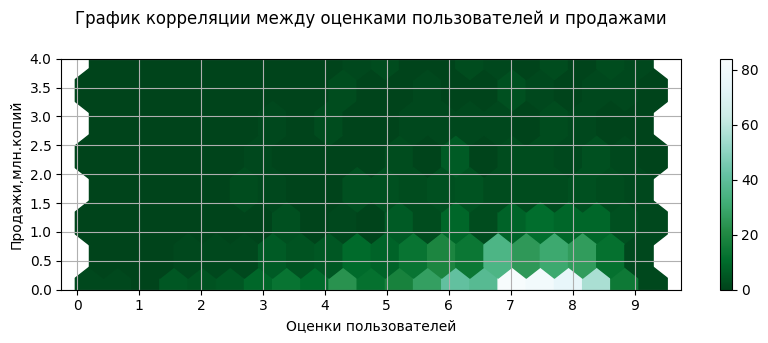

In [157]:
#график 
df.plot(
    x='user_score', 
    y='total_sales', 
    kind='hexbin', 
    figsize=(10, 3), 
    grid=True, 
    sharex=False, 
    gridsize=20, 
    cmap=plt.cm.BuGn_r)

plt.ylim([0,4])
plt.title('График корреляции между оценками пользователей и продажами', pad=25)
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи,млн.копий')
plt.xticks(range(10))

plt.show()

Да, больше всего игр продается с оценками 6,5-8,5 баллов, но и  с другими оценками продавалось немало. 
Высокую оценку пользователя получить непросто, но похоже и не нужно.

### Оценки критиков.

In [159]:
#график
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['critic_score'], y=df['total_sales'], mode='markers'))
     
fig.update_layout(
      title_text='График корреляции между отзывами пользователей и продажами 2014-2016 гг.',
      title_font_size=20,
      yaxis_title='Продажи, млн.копий',
      xaxis_title='Оценки пользователей',
      xaxis=dict(dtick=10)
 )

fig.show()

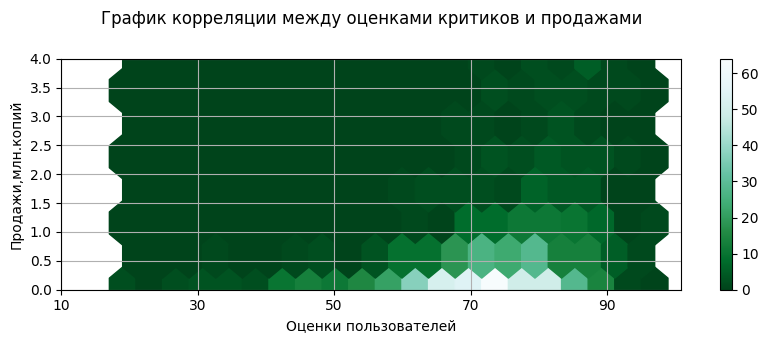

In [160]:
#график
df.plot(
    x='critic_score', 
    y='total_sales', 
    kind='hexbin', 
    figsize=(10, 3), 
    grid=True, 
    sharex=False, 
    gridsize=20, 
    cmap=plt.cm.BuGn_r
  )

plt.ylim([0,4])
plt.title('График корреляции между оценками критиков и продажами', pad=25)
plt.xlabel('Оценки пользователей')
plt.ylabel('Продажи,млн.копий')
plt.xticks(range(10,100,20))

plt.show()

Оценки критиков кажется юбольше влияют на продажи, на графике продажи тянутся ввысь по мере роста оценки. 
Самое большее количество проданных копии у игр с оценками критиков от 65 до 85.

### Подсчет корреляций.

In [163]:
#посчитаем корреляции
display('Корреляция продаж с оценками пользователей',round(df['total_sales'].corr(df['user_score']),3))
display('Корреляция продаж с оценками критиков', round(df['total_sales'].corr(df['critic_score']),3))

'Корреляция продаж с оценками пользователей'

-0.013

'Корреляция продаж с оценками критиков'

0.328

Корреляция оценок пользователей и продаж отсуствует.   
Есть небольшая корреляция продаж с оценками критиков. 

### Корреляция оценок и продаж по платформам. 
Ранее мы выделили лидеров по продажам, а остальные платформы сгруппировали в Others. Обратимся к этому нашему распределению, т.е. столбцу category. 

In [176]:
category_platform = df.groupby('top')['critic_score', 'user_score', 'total_sales'].median()\
    .sort_values(by='total_sales', ascending=False)

print('')
print('Медианные значения оценок пользователей и критиков, а также продаж по лидерам и остальным платформам в группе')
category_platform


Медианные значения оценок пользователей и критиков, а также продаж по лидерам и остальным платформам в группе


,critic_score,user_score,total_sales
top,,,
XOne,76.0,6.80,0.205
PS4,73.0,7.10,0.185
X360,67.0,6.00,0.180
PS3,67.0,6.55,0.110
3DS,69.0,7.40,0.090
others,74.0,7.30,0.050


In [177]:
print('Коэффициент корреляции')
print()

print('{: <30}|{: <30}|{: <30}|{: <30}'.format(
                                        'продажи и оценки критиков', 
                                        '% пропусков' , 
                                        'продажи и оценки пользователей',
                                        '% пропусков')
     )

print('___________________________________________________________________________________________________________________')
print()

for name_platform in df['top'].unique():
    print(name_platform)
    print()
    print(
        '{: <30.2}{: <30.2}{: <30.2}{: <30.2}'.format(
                df[df['top']==name_platform]['total_sales']\
                                   .corr(df[df['top']==name_platform]['critic_score']),
                                   
                df[df['top']==name_platform]['critic_score'].isna().mean(), 
                                   
                                      
                df[df['top']==name_platform]['total_sales']\
                                   .corr(df[df['top']==name_platform]['user_score']),
        
                df[df['top']==name_platform]['user_score'].isna().mean()
    ))
    
    print('___________________________________________________________________________________________________________________')
    print()

Коэффициент корреляции

продажи и оценки критиков     |% пропусков                   |продажи и оценки пользователей|% пропусков                   
___________________________________________________________________________________________________________________

PS4

0.4                           0.37                          -0.04                         0.36                          
___________________________________________________________________________________________________________________

3DS

0.31                          0.76                          0.22                          0.74                          
___________________________________________________________________________________________________________________

XOne

0.43                          0.32                          -0.07                         0.28                          
___________________________________________________________________________________________________________________

other

По расчтеным данным корреляция слабо выражена от оценок критиков, корреляция держится на уровне 0,4. Зависимость от оценок пользоваталей отсуствует и вовсе, расчетные значения корреляции разрозненные. Также стоит вспомнить, что в данных очень много пропусков именно в столбцах 'critic_score' и 'user_score', а для платформы Wii для примера процент пропусков доходит до 100%.
Т.е. данные выводы не могут быть полностью достоверными из-за неполноты данных. 

## Распределение игр по жанрам. 

В этом пункте мы посмотрим как иры распределяются по жанрам, какие жанры больше всего продаются.  

In [267]:
#средние продажи на 1 игру в жанре
genre = df.groupby('genre')['total_sales'].agg(['count', 'sum']).reset_index()
genre['mean_sales'] = genre['sum']/ genre['count']
genre = genre.sort_values(by='mean_sales', ascending =False).reset_index(drop=True)


genre

,genre,count,sum,mean_sales
0,Shooter,128,170.94,1.335469
1,Sports,161,109.48,0.680000
2,Platform,38,18.09,0.476053
3,Fighting,60,28.22,0.470333
4,Role-Playing,221,101.44,0.459005
5,Racing,69,27.52,0.398841
6,Misc,113,37.55,0.332301
7,Action,619,199.36,0.322068
8,Simulation,44,13.13,0.298409
9,Puzzle,14,2.21,0.157857


Итак, в среднем больше всего продаж на одну игру делает жанр Shooter, с отрывом в 2 раза от нижеследующего фаворита Sports.  
В пятерку входит Shooter,Sports,Platform,Fighting,Role-Playing. Если же ранжировать жанры только по кол-ву игр или только по продажам то получаем следующую картину. 

In [316]:
#рейтинг жанров по кол-ву игр
genre_count = genre[['genre','count']].sort_values(by='count', ascending =False).reset_index()
genre_count

,index,genre,count
0,7,Action,619
1,4,Role-Playing,221
2,11,Adventure,185
3,1,Sports,161
4,0,Shooter,128
5,6,Misc,113
6,5,Racing,69
7,3,Fighting,60
8,8,Simulation,44
9,2,Platform,38


Я специально сохранила изначальный идекс, чтобы видеть на каком месте жанр стоит по средним продажам на игру. Тройку лидеров по кол-ву представлнных игр составляют жанры Action,Role-Playing,Adventure,Sports,Shooter. Причем Action и Adventure по средним продажам стоят во второй половине списка: из 12 жанров на 8 и 12 местах соотвествено.

In [317]:
#рейтинг жанров по кол-ву проданных копий 
genre[['genre','sum']].sort_values(by='sum', ascending =False).reset_index()

,index,genre,sum
0,7,Action,199.36
1,0,Shooter,170.94
2,1,Sports,109.48
3,4,Role-Playing,101.44
4,6,Misc,37.55
5,3,Fighting,28.22
6,5,Racing,27.52
7,2,Platform,18.09
8,11,Adventure,17.55
9,8,Simulation,13.13


По кол-ву проданных копий показали себя жанры Action,Shooter,Sports,Role-Playing,Misc. Место явных лидеров делят уже Action и Shooter.

''

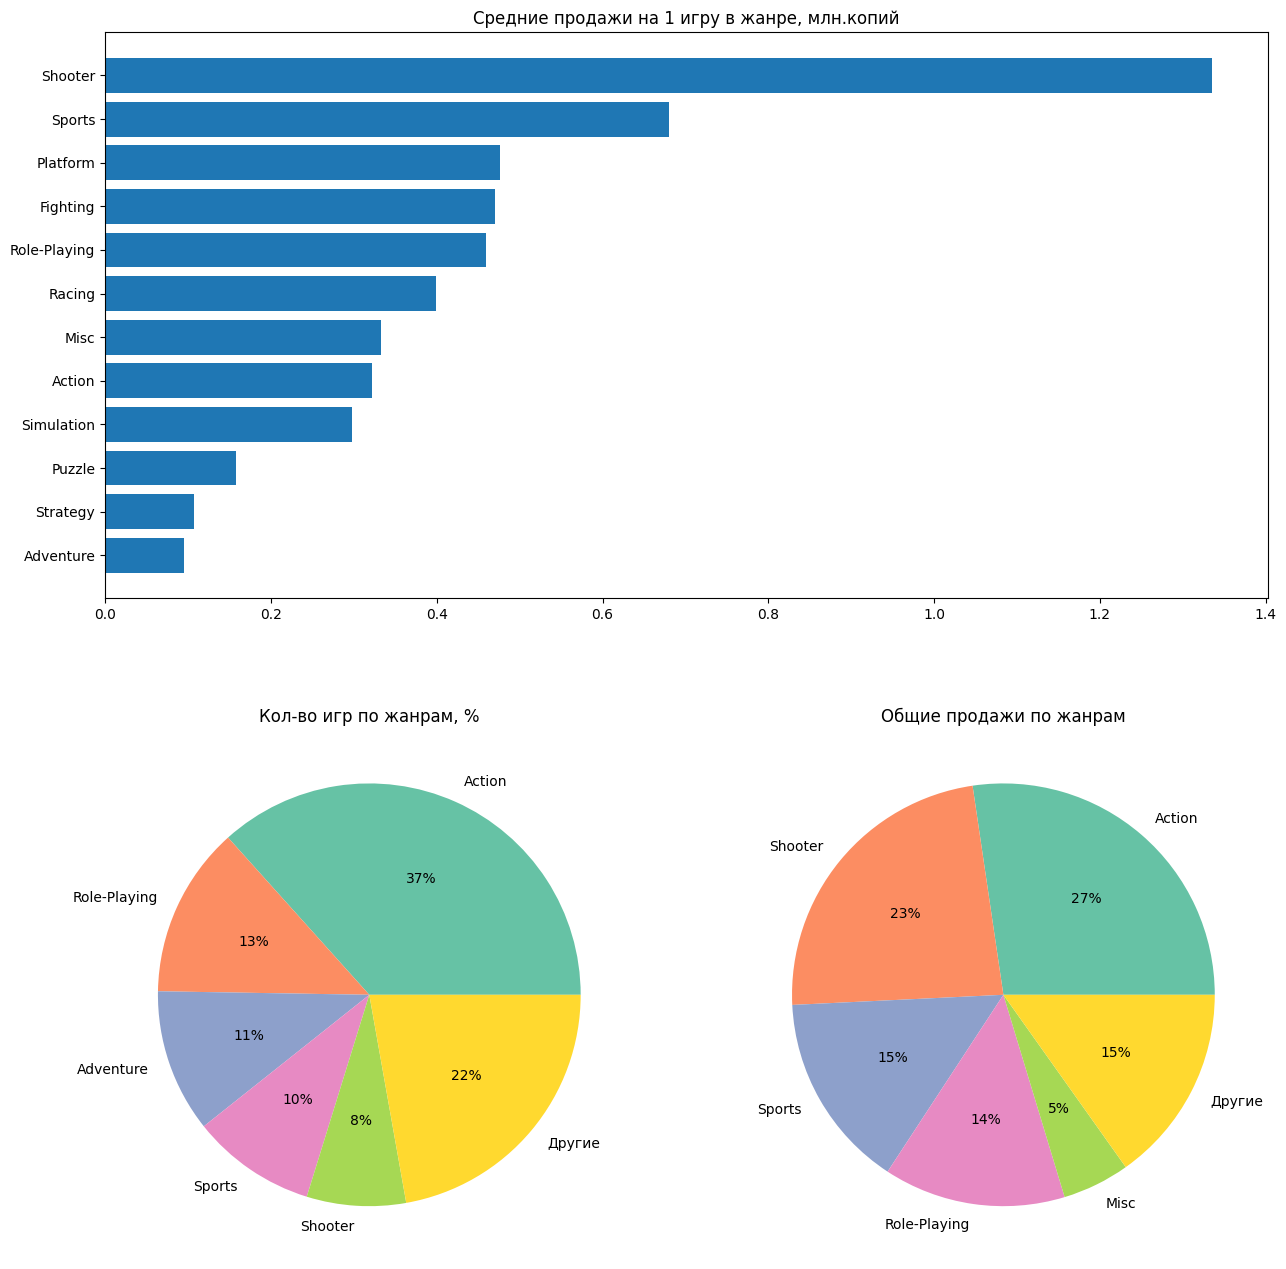

In [318]:
#жанры на графиках 

fig = plt.figure(figsize=(15, 25))

gs = fig.add_gridspec(3, 2)           #задаем сетку 3х2

ax = [None for _ in range(3)]

ax[0] = fig.add_subplot(gs[0, :])     #для каждого графика задаем позицию и размер                              
                                         #через элементы сетки   
ax[0].set_title('Средние продажи на 1 игру в жанре, млн.копий')
ax[0].barh(
    genre ['genre'],
    genre ['mean_sales']
      )



ax[1] = fig.add_subplot(gs[1, 0])

#запишем жанры-нелидеров в категоию другие
genre_count = genre[['genre','count']].sort_values(by='count', ascending =False).reset_index(drop=True)
genre_count.loc[5] = ['Другие', genre_count.loc[5:]['count'].sum().round(2)]
genre_count =genre_count.head(6)


ax[1].pie(
    genre_count ['count']
    ,labels=genre_count['genre']
    ,autopct='%1.0f%%'
    ,colors=sns.color_palette('Set2')
      )
ax[1].set_title('Кол-во игр по жанрам, %')


ax[2] = fig.add_subplot(gs[1, 1])

#запишем жанры-нелидеров в категоию другие
genre_sum = genre[['genre','sum']].sort_values(by='sum', ascending =False).reset_index(drop=True)
genre_sum.loc[5] = ['Другие', genre_sum.loc[5:]['sum'].sum().round(2)]
genre_sum =genre_sum.head(6)
# 

ax[2].pie(
    genre_sum ['sum']
    ,labels=genre_sum['genre']
    ,autopct='%1.0f%%'
    ,colors=sns.color_palette('Set2')
      )
ax[2].set_title('Общие продажи по жанрам')
;

Мы видим что в зависимости от выбранного показателя, разные жанры занимают разные места. В нашем анализе за успешность жанра приняты продажи на 1 игру в жанре. Явные лидеры это жанры Shooter и Sports. Также Жанры этих игр не занимают лидирующие места по кол-ву игр, т.е. ниша не переполнена предложениями.  По общим продажам мы также вифдим что жанры пользуются популярностью и входят в топ, что может свидетельствовать о спросе. 

Интересно, что по общим продажам мы увидели жанр Musc в топах, но этот жанр не фигуриет в топах по средним продажам на игру и кол-ву игр в жанре. Возможно стоит увеличить предложение игр в этом жанре. 


Можно сказать что нецелесообразно запускать игры в жанре Action и Adventure, в жанре Action уже большой выбор игр, а жанр Adventure при всей своей представленности делает меньше всех продаж на 1 игру.

## Рейтинг ESRB.

Пропишем сначала расшифровку рейтингов:
 - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.    
 - «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.    
 - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики. 
 - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. 

In [341]:
#распределение игр по рейтингам
rating = df.groupby('rating')['total_sales'].agg (['count', 'sum']).reset_index()
rating

,rating,count,sum
0,E,219,133.13
1,E10+,185,71.68
2,M,265,226.54
3,T,271,99.13
4,no_rating,749,198.97


''

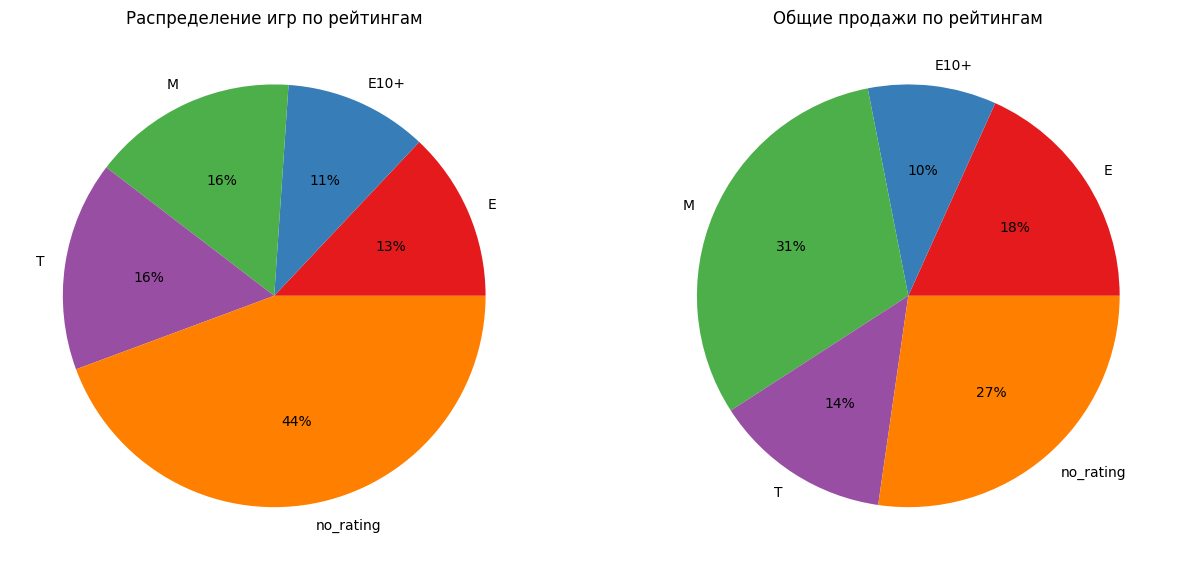

In [340]:
#рейтинги на графиках

fig = plt.figure(figsize=(15, 25))

gs = fig.add_gridspec(2, 2)   

ax = [None for _ in range(2)]


ax[0] = fig.add_subplot(gs[0, 0])      
ax[0].set_title('Распределение игр по рейтингам')
ax[0].pie(
    rating ['count']
    ,labels=rating['rating']
    ,autopct='%1.0f%%'
    ,colors=sns.color_palette('Set1')
      )


ax[1] = fig.add_subplot(gs[0, 1]) 
ax[1].set_title('Общие продажи по рейтингам')
ax[1].pie(
    rating ['sum']
    ,labels=rating['rating']
    ,autopct='%1.0f%%'
    ,colors=sns.color_palette('Set1')
      )
;




Как видим почти половина игр не имеют рейтинга, в тоже время продажи игр с рейтингом составляют 73% от общего объема продаж. Из чего следует, что получение рейтинга желательно для игры в целях повышения ее продаж.  

## Вывод.
Были изучены взаимосязь между оценками пользователей и критиков и продажами посредством расчета корреляции и построении графиков корреляции как в сумме по всем платформам, так и по каждой платформе отдельно. На основании полученных данных можно заключить, что корреляция оценок пользователей и продаж отсуствует, есть небольшая корреляция продаж с оценками критиков.

По расченым данным корреляция слабо выражена от оценок критиков, корреляция держится на уровне 0,4. Зависимость от оценок пользоваталей отсуствует и вовсе, расчетные значения корреляции разрозненные. Это также подтверждают графики. 

Также стоит вспомнить, что в данных очень много пропусков именно в столбцах 'critic_score' и 'user_score', т.е. данные выводы не могут быть полностью достоверными из-за неполноты данных. 

В нашем анализе за успешность жанра приняты продажи на 1 игру в жанре и явные лидеры это жанры Shooter и Sports. в тоже время жанры этих игр не занимают лидирующие места по кол-ву игр, т.е. ниша не переполнена предложениями.  По общим продажам мы также видим, что данные жанры пользуются популярностью и входят в топ, что может свидетельствовать о спросе. 

Интересно, что по общим продажам мы увидели жанр Musc в топах, но этот жанр не фигуриет в топах по средним продажам на игру и кол-ву игр в жанре. Возможно стоит увеличить предложение игр в этом жанре. 

Можно сказать что нецелесообразно запускать игры в жанре Action и Adventure, в жанре Action уже большой выбор игр, а жанр Adventure при всей своей представленности делает меньше всех продаж на 1 игру.

Почти половина игр, 44%, не имеют рейтинга, в тоже время продажи игр с рейтингом составляют 73% от общего объема продаж. Из чего следует, что получение рейтинга желательно для игры в целях повышения ее продаж.

# Портрет пользователя для каждого региона.
## Распределение платформ в регионах.

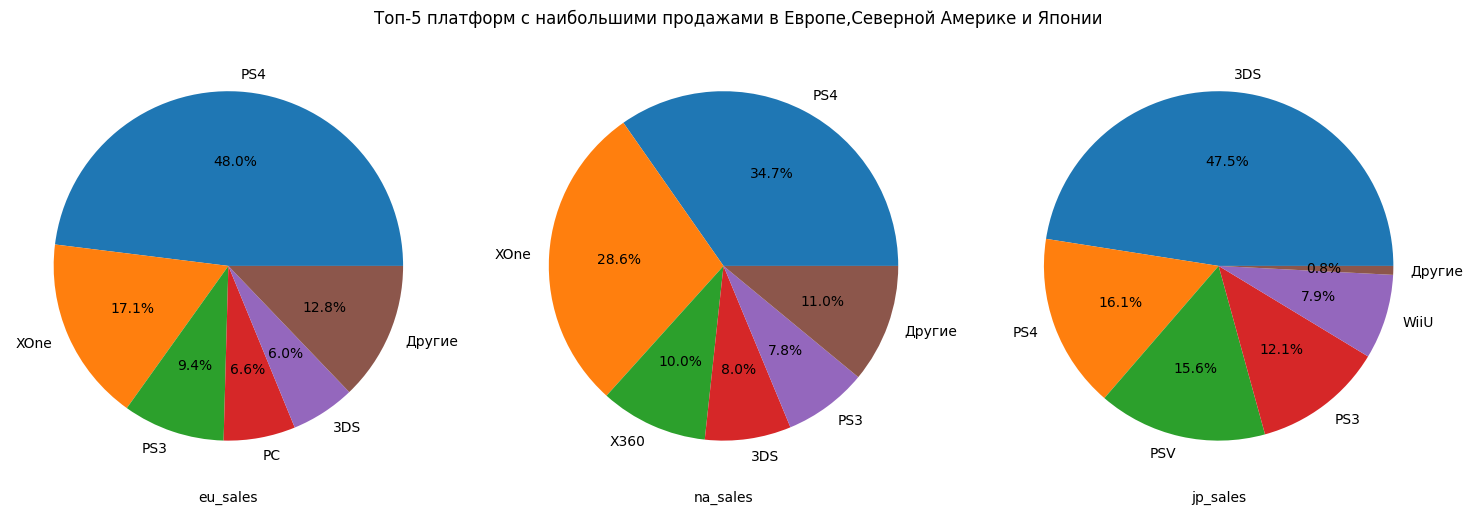

In [342]:
#график

regions_sales = ['eu_sales', 'na_sales', 'jp_sales']

with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):
    fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
    for i, region in enumerate(regions_sales):
        region_platform = df.groupby('platform').agg({region: 'sum'})\
            .sort_values(by=region, ascending=False).reset_index()
        
        region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
        region_top_platform = region_platform.head(6)
        
        region_top_platform.plot(
            ax=ax[i], 
            x='platform', 
            y=region, 
            kind='pie', 
            legend=False, 
            autopct='%1.1f%%', 
            labels=region_top_platform['platform']
            ).set(ylabel='', xlabel=region)
        
    plt.suptitle('Топ-5 платформ с наибольшими продажами в Европе,Северной Америке и Японии')
    plt.tight_layout()
    plt.show()


В Европе и Северной Америке большую часть рынка, более 60%, делят между собой платформы PS4 и Xone.   
Европа: PS4 занимает почти половина рынка -48%, на втором месте XOne, ее доля в три раза меньше PS4 - 17.1%.   
Северная Америка: PS4 -34.7%, XOne - 28.6%, В Северной Америке разрыв между платформами не такой резкий.   
Также и Европе и Северной Америке входят в топ платформы 3DS и PS3, но доля их на рынке не превышает 10%. 

Совсем иное распределение платформ в Японии.   
Здесь как и в Северной Америке есть явный лидер, занимающий половину рынка, это платформа 3DS - 47.5%. В тоже время доли остальных платформ здесь выше.    

Также если посмотреть на долю сборной солянки из малых платформ "Другие", то в Японии это меньше 1% против 12,8% и 11% в Европе и Северной Америке. Из чего можно сделать вывод, что новой платформе будет легче занять нишу на рынке Европы или Сев. Америки.

При кажущейся особенности рынка Японии также можно сказать, что есть платформы которые смогли найти своего клиента в каждом регионе.
PS4: доли рынка в каждом регионе на назовешь скромными - Европа-48%, Америка - 34,7%, Япония 16,1%.
3DS: платфома занимает половина рынка в Японии и представлена на других рынках тоже. Да, казалось бы всего 6% в Европе и 8%  в Сев. Америке, но платформа входит в топ5 в регионах. 
PS3: смогло найти свое небольшое место под солнцем в каждом регионе Европа-9,4%, Америка - 7,8%, Япония 12,1%.


## Жанры.

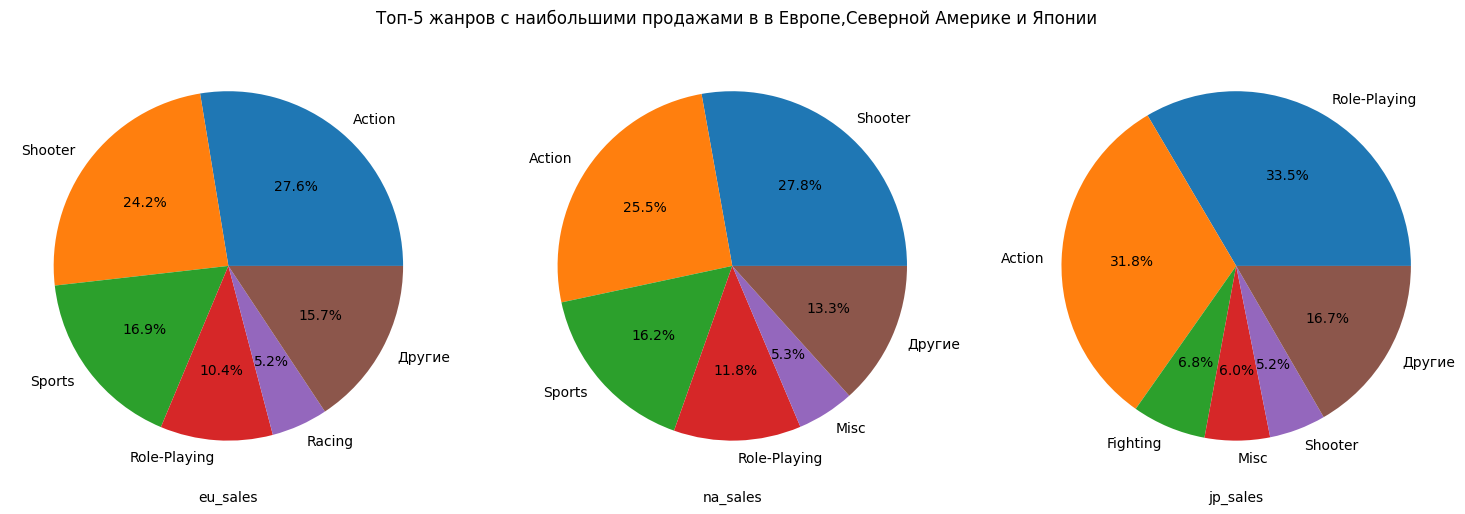

In [343]:
#график 
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']

with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):
    fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
    for i, region in enumerate(regions_sales):
        
        region_platform = df.groupby('genre').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
        
        region_platform.loc[5] = ['Другие', region_platform.loc[5:][region].sum().round(2)]
        
        region_top_platform = region_platform.head(6)
        
        region_top_platform.plot(
            ax=ax[i], 
            x='genre', 
            y=region, 
            kind='pie', 
            legend=False, 
            autopct='%1.1f%%', 
            labels=region_top_platform['genre']
        ).set(ylabel='', xlabel=region)
        
    plt.suptitle('Топ-5 жанров с наибольшими продажами в в Европе,Северной Америке и Японии')
    plt.tight_layout()
    plt.show()


В Европе и Северной Америке видим совпадение по жанрам, так например action shooter делят первых 2 места. Очень отличается картина в Японии - на первом месте жанр role-playing с 33,5, причем по сравнению с остальными регионами этим жанром увлеченны большая доля игроков в Японии, чем у лидеров в других регионах (27,8 shooter в Сев. Америке и 27,6 Action в Европе.    

Если и запускать игру для всех трех регионов, то игра  жанра Action понравиться всем. 

## Рейтинг ESRB.

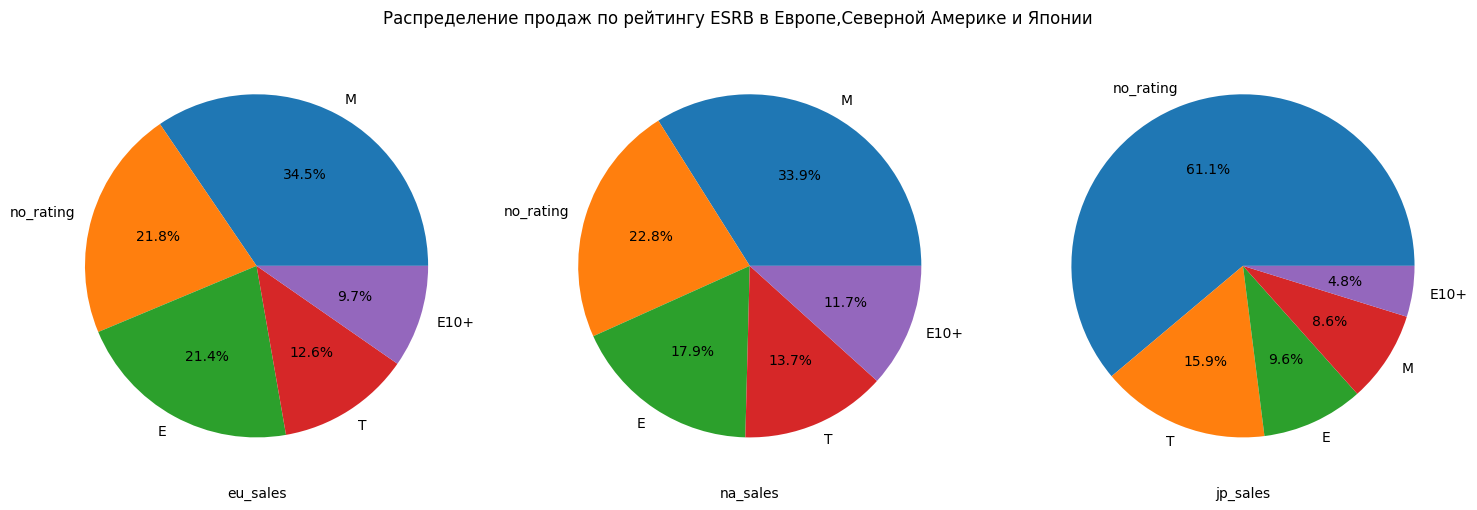

In [344]:
#график 
regions_sales = ['eu_sales', 'na_sales', 'jp_sales']

with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):
    fig, ax = plt.subplots(1, len(regions_sales), figsize=(15,5))
    for i, region in enumerate(regions_sales):
        
        region_platform = df.groupby('rating').agg({region: 'sum'}).sort_values(by=region, ascending=False).reset_index()
        
#         

        
        region_top_platform = region_platform.head(6)
        
        region_top_platform.plot(
            ax=ax[i], 
            x='genre', 
            y=region, 
            kind='pie', 
            legend=False, 
            autopct='%1.1f%%', 
            labels=region_top_platform['rating']
        ).set(ylabel='', xlabel=region)
        
    plt.suptitle('Распределение продаж по рейтингу ESRB в Европе,Северной Америке и Японии')
    plt.tight_layout()
    plt.show()


Самые зрелищные и реалистичные игры: экшены и шутеры получают взрослые рейтинги что может объяснить высокие продажи игры взрослых рейтингов в США и Европе.

Дети любят компьютерные игры, для них изготавливается свой контент. Этим можно объяснить суммарно большой процент детских игр. Игры для тинейджеров менее популярны, так как ограничены по многим параметрам. А подростки могут спокойно покупать игры со взрослыми ограничениями.

Большое распространение рейтинга Т на Японском рынке можно связать с большим распространением Аниме.

## Портрет пользователя для регионов. 
Итак, можно предположить следующий портрет пользователя в каждом регионе:  

Европа - пользователь старше 17 лет, клиент платформы PS4, играет в игры жанров Action, Shootert, Sports.  

Северная Америка - пользователь старше 17 лет, клиент платформы PS4, играет в игры жанров Action, Shootert, Sports.  

Япония  - пользователь старше 13 лет, клиент платформы 3DS, играет в игры жанров Action и Role_playing.


# Проверка гипотез.
## Гипотеза1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Проверим гипотезу, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. За нулевую гипотезу берем гипотезу, что выборки равны, т.е. средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

In [ ]:
df_XOne = df.loc[df['platform'] == 'XOne','user_score']
df_PC = df.loc[df['platform'] == 'PC','user_score']
df_XOne = df_XOne.fillna(0)
df_PC = df_PC.fillna(0)

In [ ]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df_XOne, 
    df_PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Полученное значение p-value говорит о том, что нулевая гипотеза не может быть отвергнута, поэтому вероятно, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

## Гипотеза2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим гипотезу, что Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. За нулевую гипотезу берем гипотезу, что выборки не различны, т.е. средние пользовательские рейтинги жанров Action и Sports одинаковые.

In [ ]:
df_Action = df.loc[df['genre'] == 'Action','user_score']
df_Action = df_Action.fillna(0)
df_Sports = df.loc[df['genre'] == 'Sports','user_score']
df_Sports = df_Sports.fillna(0)

In [ ]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    df_Action, 
    df_Sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 



Полученное значение p-value говорит о том, что нулевая гипотеза может быть отвергнута, поэтому вероятно, что средние пользовательские рейтинги жанров Action и Sports различаются.


# Результаты анализа: 
На анализ взяты данные интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на следуюший год.

Исходный датасет состоит из 11 столбцов и 16444 строк.   

Содержит данные числового и строчного типа. В пяти столбцах есть пропуски, это столбцы Name, Year_of_Release, Critic_Score, User_Score, Rating. В силу малой %доли пропусков  в столбцах 'name', 'genre' и 'year_of_release' строки с пропусками удалены.   

Пропуски в столбцах с оценками: critic_score, user_score, rating составляют почти 50% данных, в них никаеи изменения не вносились, дабы не исказить выводы.

Пропуски в столбце rating заполнены на говорящее no_rating.

Были преобразованы форматы столбцов 'year_of_release' в формат цельночисленного числа int и 'user_score' к численному типу float. 

Явных и неявных дубликатов в датафрейме не обнаружено.

В значениях продаж выявлены ыбросы по платформам. Создан дополнительный столбец с итоговыми продажами по всем регионам.

В анализируемом датасете 11426 игр, представленных на 31 платформах и в 12 жанрах.

По изначальным датам можно увидеть, что больше всего игр на платформах PS2, на ней представлено 12.93% от всех игр и DS, на ней- 12.90%. Самыми попудярными жанрами являются Action -20,11%, Sports - 14,02%, Misc - 10,47%

Производство игр начало стремительно расти с 1991г, пик значений приходится на 2008-2009 гг. 

Лидерами продаж за весь рассматриваемый период платформы PS2, X360, PS3, Wii, DS, PS.   
Были изучены продажи платформ в динамике по годам. У всех платформ наблюдается стремительный рост и не менее стремительное падение. Максимальные продажи в лучшие годы жизни платформ составляли 150-200 млн.копий. 

По динамике продаж платформ также можно усмотреть 2 сценария жизни успешной игры: 
1. высокие продажи сразу на следующий год после запуска платформы 
2. равномерный рост в течение 5- 6 лет 

После запуска Платформы имели жизненный цикл примерно в 10 лет. В среднем игровая платформа живет 6 лет, а жизнь успешых платформ дольше и составляет 10,5 лет.Так как компьютерные игры - динамично развивающаяся индустрия для целей прогнозирования продаж на следующий год период исследования сокращен до 3 лет - это 2014-2016г.    

За 2014-2016 гг. со значительным отрывом в лидерах по общим продажах платформы PS4, на 2ом месте платформа XOne, она сделала продаж вдвое  меньше PS4. Втрое меньше PS4 сделала пллатформа 3DS. И остальные прлатформы идут дальше по убывающей c шагом 20-30% до практически околонулевых значений платформы PSP. 

Также было изученно распределение платформ по медианным значениям. Здесь выделись 5 платформ- XOne, WiiU, PS4, Wii,X360. И разрыв между платформами Значительно меньше чем по общим продажам, он не превышает 7%. 

В среднем продажи игр варьируются от 0,180 млн. до 0,205 млн. по платформам. Самые высокие максимальные средние продажи у  платформы WiiU.

PS4, которая была лидером по общим продаж, сейчас по медианным значениям занимает только третье место , т.к. имеет много выбросов и максимальлные значения ее выбросов выше чем у остальных платформ.

Были изучены взаимосязь между оценками пользователей и критиков и продажами посредством расчета корреляции и построении графиков корреляции как в сумме по всем платформам, так и по каждой платформе отдельно. На основании полученных данных можно заключить, что корреляция оценок пользователей и продаж отсуствует, есть небольшая корреляция продаж с оценками критиков.

По расченым данным корреляция слабо выражена от оценок критиков, корреляция держится на уровне 0,4. Зависимость от оценок пользоваталей отсуствует и вовсе, расчетные значения корреляции разрозненные. Это также подтверждают графики. 

Также стоит вспомнить, что в данных очень много пропусков именно в столбцах 'critic_score' и 'user_score', т.е. данные выводы не могут быть полностью достоверными из-за неполноты данных. 

В нашем анализе за успешность жанра приняты продажи на 1 игру в жанре и явные лидеры это жанры Shooter и Sports. в тоже время жанры этих игр не занимают лидирующие места по кол-ву игр, т.е. ниша не переполнена предложениями.  По общим продажам мы также видим, что данные жанры пользуются популярностью и входят в топ, что может свидетельствовать о спросе. 

Интересно, что по общим продажам мы увидели жанр Musc в топах, но этот жанр не фигуриет в топах по средним продажам на игру и кол-ву игр в жанре. Возможно стоит увеличить предложение игр в этом жанре. 

Можно сказать что нецелесообразно запускать игры в жанре Action и Adventure, в жанре Action уже большой выбор игр, а жанр Adventure при всей своей представленности делает меньше всех продаж на 1 игру.

Почти половина игр, 44%, не имеют рейтинга, в тоже время продажи игр с рейтингом составляют 73% от общего объема продаж. Из чего следует, что получение рейтинга желательно для игры в целях повышения ее продаж.

  
    
    


**Рекомендации:** 

-заказывать игры с платформы PS4,   

-расширить предложение игр в жанрах Shooter, Sports,Musc,  

-наличие рейтинга желательно для игры в целях повышения ее продаж,   

-наличие высокой оценки критиков,  

-рост продаж на платформе должен быть на протяжении 5 лет,   

-для рынка Японии выбирать платформу 3DS и жанр Role-playing.

    

